### To analyze market sentiment

In [1]:
!pip install newsapi-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',1000)
import yfinance as yf

In [5]:
def get_sources(category = None):
  newsapi = NewsApiClient(api_key='1900869fa01647fca0bdc19b4550daa0')
  sources = newsapi.get_sources()
  if category is not None:
    rez = [source['id'] for source in sources['sources'] if source['category'] == category and source['language'] == 'en']
  else:
    rez = [source['id'] for source in sources['sources'] if source['language'] == 'en']
  return rez

In [6]:
get_sources('business')

['australian-financial-review',
 'bloomberg',
 'business-insider',
 'business-insider-uk',
 'financial-post',
 'fortune',
 'the-wall-street-journal']

In [7]:
def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
   
  newsapi = NewsApiClient(api_key='1900869fa01647fca0bdc19b4550daa0')
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = get_sources('business','en')
  if sources_list:
    articles = newsapi.get_everything(q=keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q=keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sort_by="relevancy",
                                      page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()
  
  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])
      
      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))
  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0],reverse=True)   
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])

In [12]:
# GLOBAL PARAMS - for one event

SHOW_ALL_ARTICLES = True
# SHOW_ALL_ARTICLES = False

#the day of the event 
# STARTD = '22-Jun-2020' 
# STARTD = '19-Jun-2020' 
STARTD = '9-Jul-2020'


#the search phrase for News API
# KEYWRD = 'Inovio Pharmaceuticals stock'
KEYWRD = 'Apple Inc.'
#KEYWRD = 'Berkshire Hathaway Inc.'


#tiker
# tkr = "MSFT"
tkr = 'AAPL'
#tkr = 'AMZN'
# tkr = 'GOOG'

In [14]:
import sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
### Uncomment it when the script runs for the first time 
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


0.153024
100
0                                                                                                                                                                                                    Twitter joins eToro to let users see real-time stock information  Reuters
1                                                                                                                                                         The GeForce RTX 4070 is Nvidia's newest GPU, made to support 4K gaming and streaming, and is out now from just $599.
2     <ol><li>Stocks sink, JPMorgan surges after earnings: Stock market news today  Yahoo Canada Finance\r\n</li><li>The close: Wall Street dips as rate hike bets firm, banks jump  The Globe and Mail\r\n</li><li>Wall St set for lower open as retail sales data offsets e…
3     <ol><li>Big banks including JPMorgan see shares climb after results; Boeing stock stumbles  MarketWatch\r\n</li><li>Before the Bell: Futures muted ahead of U.S. bank re

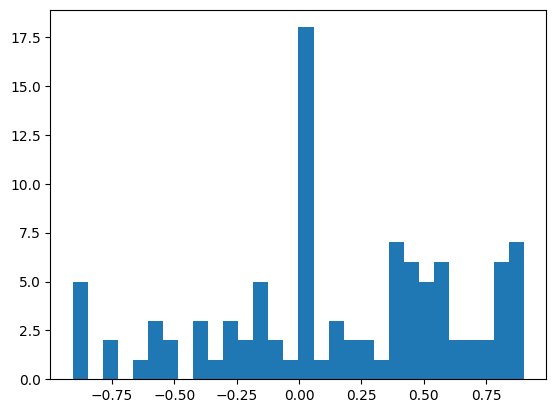

In [15]:
return_articles = get_articles_sentiments(keywrd= 'stock' ,startd = '13-Apr-2023',sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30,grid=False)
print(return_articles.Sentiment.mean())
print(return_articles.Sentiment.count())
print(return_articles.Description)

In [16]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
news_tables = {}
tickers = ['AMZN', 'AAPL', 'GOOG','MSFT']
#https://github.com/HanadHassan/stock_sentiment/blob/master/Sentiment%20.ipynb

for ticker in tickers:
    url = finwiz_url + ticker
    #req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    req = Request(url=url) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

HTTPError: ignored